In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path_ride_data = os.path.join('raw_data','ride_data.csv')
csv_path_city_data = os.path.join('raw_data','city_data.csv')

In [3]:
rides_df = pd.read_csv(csv_path_ride_data)
cities_df = pd.read_csv(csv_path_city_data)

In [4]:
# check for number of rows
rides_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
# drop the empty rows and then do a count
rides_df = rides_df.dropna(how='any')

rides_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
# check for repeating cities
print("Length of Value Counts: {}".format(len(rides_df['city'].value_counts())))
print('Length of Unique Cities: {}'.format(len(rides_df['city'].unique())))

Length of Value Counts: 125
Length of Unique Cities: 125


In [7]:
# check for number of rows
cities_df.count()

city            126
driver_count    126
type            126
dtype: int64

In [8]:
# drop the empty rows and then do a count
cities_df = cities_df.dropna(how='any')

cities_df.count()

city            126
driver_count    126
type            126
dtype: int64

In [9]:
# check for repeat cities
print("Length of Value Counts: {}".format(len(cities_df['city'].value_counts())))
print('Length of Unique Cities: {}'.format(len(cities_df['city'].unique())))

Length of Value Counts: 125
Length of Unique Cities: 125


In [10]:
# display
cities_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [11]:
# display
rides_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [12]:
uber_df = pd.merge(rides_df,cities_df,on='city')
uber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


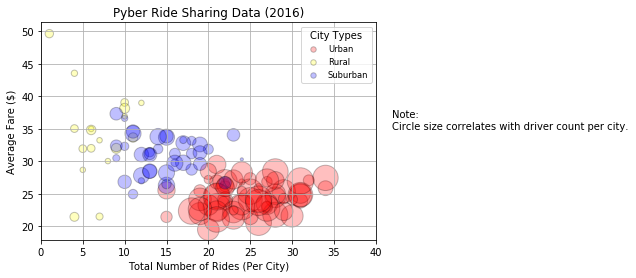

In [14]:
# setting up x,y,size for Urban
urban_df = uber_df.loc[uber_df['type'] == 'Urban']
avg_price_city_u = urban_df.groupby('city').mean()['fare']
rides_per_city_u = urban_df.groupby('city').count()['ride_id']
driver_per_city_u = urban_df.groupby('city').mean()['driver_count']

# put into a DF
urban_buble = pd.DataFrame({
    'y': avg_price_city_u,
    'x' : rides_per_city_u,
    's':driver_per_city_u
})
# graph
plt.scatter(urban_buble['x'],
            urban_buble['y'],
            marker="o", 
            facecolors="red",
            edgecolors="black",
            s=10 *urban_buble['s'],
            alpha=0.25,
            label = 'Urban')

rural_df = uber_df.loc[uber_df['type'] == 'Rural']
avg_price_city_r = rural_df.groupby('city').mean()['fare']
rides_per_city_r = rural_df.groupby('city').count()['ride_id']
driver_per_city_r = rural_df.groupby('city').mean()['driver_count']

# put into a DF
rural_buble = pd.DataFrame({
    'y': avg_price_city_r,
    'x' : rides_per_city_r,
    's':driver_per_city_r
})

plt.scatter(rural_buble['x'],
            rural_buble['y'],
            marker="o", 
            facecolors="yellow",
            edgecolors="black",
            s=10 *rural_buble['s'],
            alpha=0.25,
            label = 'Rural')

suburban_df = uber_df.loc[uber_df['type'] == 'Suburban']
avg_price_city_s = suburban_df.groupby('city').mean()['fare']
rides_per_city_s = suburban_df.groupby('city').count()['ride_id']
driver_per_city_s = suburban_df.groupby('city').mean()['driver_count']

suburban_buble = pd.DataFrame({
    'y': avg_price_city_s,
    'x' : rides_per_city_s,
    's':driver_per_city_s
})

plt.scatter(suburban_buble['x'],
            suburban_buble['y'],
            marker="o", 
            facecolors="blue",
            edgecolors="black",
            s= 10 *suburban_buble['s'],
            alpha=0.25,
            label = 'Suburban')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")



# Show plot
plt.show()
